In [1]:
import matplotlib.pyplot as plt
import numpy as np

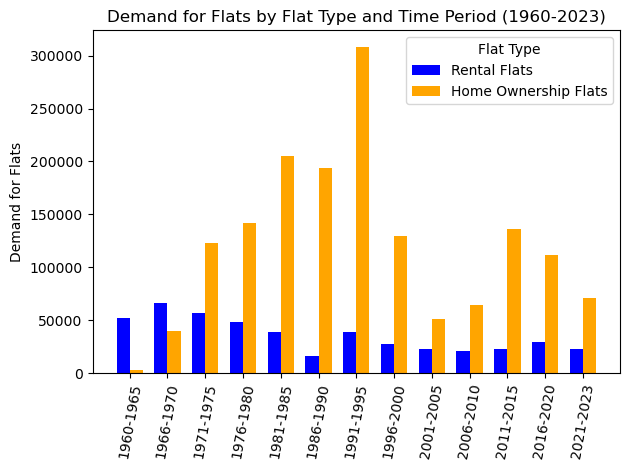

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Define dtype for the structured array
dtype = [
    ('start_year', 'i8'),
    ('end_year', 'i8'),
    ('flat_type', 'U50'),
    ('demand_for_flats', 'f8'),
]

# Load data from CSV file
fname1 = "DemandforRentalandSoldFlats.csv"
data = np.genfromtxt(fname1, skip_header=1, dtype=dtype, delimiter=",", missing_values=['na', '-'], filling_values=0)

# Filter data by flat type
rental_flats = data[data["flat_type"] == "rental_flats"]
home_ownership_flats = data[data["flat_type"] == "home_ownership_flats"]

# Create a time period label as a list
time_period = [f"{row['start_year']}-{row['end_year']}" for row in rental_flats]

# Plot grouped bar chart using only Matplotlib
x = np.arange(len(rental_flats)) 
width = 0.35  # the width of the bars

# Plot bars
plt.bar(x - width/2, rental_flats['demand_for_flats'], width, color='blue', label='Rental Flats')
plt.bar(x + width/2, home_ownership_flats['demand_for_flats'], width, color='orange', label='Home Ownership Flats')

# Adding labels, title, and legend
plt.ylabel('Demand for Flats')
plt.title('Demand for Flats by Flat Type and Time Period (1960-2023)')
plt.xticks(x,time_period,rotation=80)
plt.legend(title='Flat Type')



# Show the plot
plt.tight_layout()
#save plot
plt.savefig("Demandforflatsbyflattype.png", dpi=300,bbox_inches="tight")
plt.show()



In [3]:
#Combining all resale into 1 file


file_list = ["Resale-1990to1999.csv","Resale-2000to2012.csv", "Resale-2012to2014.csv"]

#define datatype
dtype = [
    ('month', 'U50'),
    ('town', 'U50'),
    ('flat_type', 'U50'),
    ('block', 'U50'),
    ('street_name', 'U50'),
    ('storey_range', 'U50'),
    ('floor_area_sqm', 'f8'),
    ('flat_model', 'U50'),
    ('lease_commence_date', 'f8'),
    ('resale_price', 'f8')
]

#adding remaining lease
new_dtype_descr = dtype[:-1] + [('remaining_lease', 'f8')] + [dtype[-1]]
new_dtype = np.dtype(new_dtype_descr)

# store array in new list
data_list = []

# Loop through each file and load the data
for fname in file_list:
    data = np.genfromtxt(
        fname,
        skip_header=1,
        dtype=dtype,
        delimiter=",",
        missing_values=['na', '-'],
        filling_values=0
    )
    
   #create new data for arrays
    data_extended = np.zeros(data.shape, dtype=new_dtype)
    
    # copy the existing data to the new structured array
    for field in data.dtype.names:
        data_extended[field] = data[field]
     # Append to the data list
    data_extended['remaining_lease'] = 0.0
    data_list.append(data_extended)

# combine all the arrays
combined_data1 = np.concatenate(data_list)

#check if datalist1 are combined
print(combined_data1)

# 2nd list of csv files from 2015-2017
file_list2 = ["Resale-2015to2016.csv", "Resale-2017-onwards.csv"]

#define data type
dtype2 = [
    ('month', 'U50'),
    ('town', 'U50'),
    ('flat_type', 'U50'),
    ('block', 'U50'),
    ('street_name', 'U50'),
    ('storey_range', 'U50'),
    ('floor_area_sqm', 'f8'),
    ('flat_model', 'U50'),
    ('lease_commence_date', 'f8'),
    ('remaining_lease','U50'),
    ('resale_price', 'f8')
]
#store in new datalist
data_list2 = []

# Loop through each file and load the data
for fname in file_list2:
    data2 = np.genfromtxt(
        fname,
        skip_header=1,
        dtype=dtype2,
        delimiter=",",
        missing_values=['na', '-'],
        filling_values=0
    )
    data_list2.append(data2)
# combine all arrays into one structured array
combined_data2 = np.concatenate(data_list2)

#to check if datalist 2 are combined
print(combined_data2)

# Combine all resale prices into 1
combined_all=np.concatenate([combined_data1,combined_data2])

#check if all combined
print(combined_all)

# replace string in the 'flat_model' column
old_value = "MULTI GENERATION"
new_value = "MULTI-GENERATION"
combined_all['flat_type'] = np.char.replace(combined_all['flat_type'], old_value, new_value)


# Save to CSV
np.savetxt(
    'combined_resale_price4.csv',
    combined_all,
    delimiter=",",
    fmt='%s',
    header="month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price",
    comments=''
)

[('1990-01', 'ANG MO KIO', '1 ROOM', '309', 'ANG MO KIO AVE 1', '10 TO 12',  31., 'IMPROVED', 1977., 0.,   9000.)
 ('1990-01', 'ANG MO KIO', '1 ROOM', '309', 'ANG MO KIO AVE 1', '04 TO 06',  31., 'IMPROVED', 1977., 0.,   6000.)
 ('1990-01', 'ANG MO KIO', '1 ROOM', '309', 'ANG MO KIO AVE 1', '10 TO 12',  31., 'IMPROVED', 1977., 0.,   8000.)
 ...
 ('2014-12', 'YISHUN', 'EXECUTIVE', '618', 'YISHUN RING RD', '07 TO 09', 164., 'Apartment', 1992., 0., 738000.)
 ('2014-12', 'YISHUN', 'EXECUTIVE', '277', 'YISHUN ST 22', '07 TO 09', 152., 'Maisonette', 1985., 0., 592000.)
 ('2014-12', 'YISHUN', 'EXECUTIVE', '277', 'YISHUN ST 22', '04 TO 06', 146., 'Maisonette', 1985., 0., 545000.)]
[('2015-01', 'ANG MO KIO', '3 ROOM', '174', 'ANG MO KIO AVE 4', '07 TO 09',  60., 'Improved', 1986., '70',  255000.)
 ('2015-01', 'ANG MO KIO', '3 ROOM', '541', 'ANG MO KIO AVE 10', '01 TO 03',  68., 'New Generation', 1981., '65',  275000.)
 ('2015-01', 'ANG MO KIO', '3 ROOM', '163', 'ANG MO KIO AVE 4', '01 TO 03',  

These are the flat types in the flat_type column: ['1 ROOM' '2 ROOM' '3 ROOM' '4 ROOM' '5 ROOM' 'EXECUTIVE'
 'MULTI-GENERATION']

Number of unique estates: 27

The resale prices of these estates are calculated: ['ANG MO KIO' 'BEDOK' 'BISHAN' 'BUKIT BATOK' 'BUKIT MERAH' 'BUKIT PANJANG'
 'BUKIT TIMAH' 'CENTRAL AREA' 'CHOA CHU KANG' 'CLEMENTI' 'GEYLANG'
 'HOUGANG' 'JURONG EAST' 'JURONG WEST' 'KALLANG/WHAMPOA' 'LIM CHU KANG'
 'MARINE PARADE' 'PASIR RIS' 'PUNGGOL' 'QUEENSTOWN' 'SEMBAWANG' 'SENGKANG'
 'SERANGOON' 'TAMPINES' 'TOA PAYOH' 'WOODLANDS' 'YISHUN']

Average Resale Prices by Flat Type Across Each Year:

Flat Type: 1 ROOM
Year: 1990, Avg Resale Price: 7890
Year: 1991, Avg Resale Price: 8501
Year: 1992, Avg Resale Price: 9648
Year: 1993, Avg Resale Price: 17634
Year: 1994, Avg Resale Price: 24824
Year: 1995, Avg Resale Price: 37398
Year: 1996, Avg Resale Price: 57417
Year: 1997, Avg Resale Price: 72173
Year: 1998, Avg Resale Price: 48706
Year: 1999, Avg Resale Price: 50735
Year: 2000, 

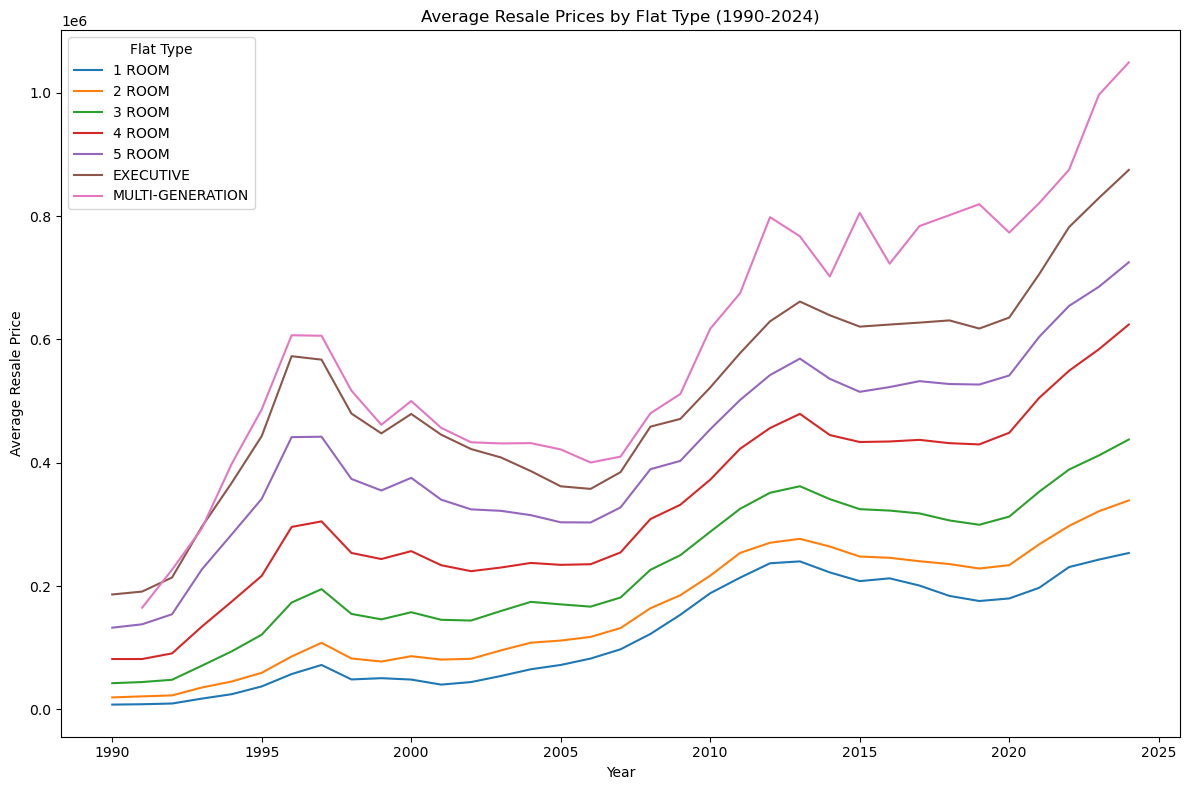

In [1]:
import numpy as np
import matplotlib.pyplot as plt

data = np.genfromtxt(
    "combined_resale_price4.csv",
    skip_header=1,
    delimiter=",",
    missing_values=['na', '-'],
    filling_values=0,
    dtype=[
        ('month', 'U7'),  
        ('town', 'U50'),
        ('flat_type', 'U50'),
        ('block', 'U50'),
        ('street_name', 'U50'),
        ('storey_range', 'U50'),
        ('floor_area_sqm', 'f8'),
        ('flat_model', 'U50'),
        ('lease_commence_date', 'f8'),
        ('remaining_lease', 'U50'),
        ('resale_price', 'f8')
    ]
)

# extract year from 'month' (format 'YYYY-MM') and add it to the array
years = np.array([int(item.split('-')[0]) for item in data['month']])
#convert all to upper case in flat_type
flat_type = np.array([flat_type.upper() for flat_type in data['flat_type']])  

# extract relevant columns
flat_types = data['flat_type']
resale_prices = data['resale_price']
estates=data['town']

# define the year range
year_range = np.arange(1990, 2025)

# find the unique flat types
unique_flat_types = np.unique(flat_types)
#show the unique flat types
print(f'These are the flat types in the flat_type column: {unique_flat_types}')

#find unique town type
unique_town = np.unique(estates)
print(f'\nNumber of unique estates: {len(unique_town)}')
print(f'\nThe resale prices of these estates are calculated: {unique_town}')

# initialize a dictionary to store results
avg_prices_by_year = {flat_type: [] for flat_type in unique_flat_types}

# calculate average resale prices by year and flat type
for flat_type in unique_flat_types:
    for year in year_range:
        combined_mask = (years == year) & (flat_types == flat_type)
        avg_price = resale_prices[combined_mask].mean() if np.any(combined_mask) else np.nan
        avg_prices_by_year[flat_type].append(avg_price)

#show the results
print("\nAverage Resale Prices by Flat Type Across Each Year:")
for flat_type, prices in avg_prices_by_year.items():
    print(f"\nFlat Type: {flat_type}")
    for year, avg_price in zip(year_range, prices):
        if not np.isnan(avg_price):
            print(f"Year: {year}, Avg Resale Price: {int(avg_price)}")
        else:
            print(f"Year: {year}, Avg Resale Price: No Data")

# plot line chart to compare resale prices over the years in different unit
plt.figure(figsize=(12, 8))
for flat_type, prices in avg_prices_by_year.items():
    plt.plot(year_range, prices, label=flat_type)

plt.title("Average Resale Prices by Flat Type (1990-2024)")
plt.xlabel("Year")
plt.ylabel("Average Resale Price")
plt.legend(title="Flat Type")
plt.tight_layout()
#save plot
plt.savefig("AvgResalePricebyFlatType.png",dpi=300, bbox_inches="tight")
plt.show()


Percentage of people staying in different room types:
1 ROOM: 0.14%
2 ROOM: 1.30%
3 ROOM: 31.82%
4 ROOM: 38.07%
5 ROOM: 21.11%
EXECUTIVE: 7.50%
MULTI-GENERATION: 0.06%


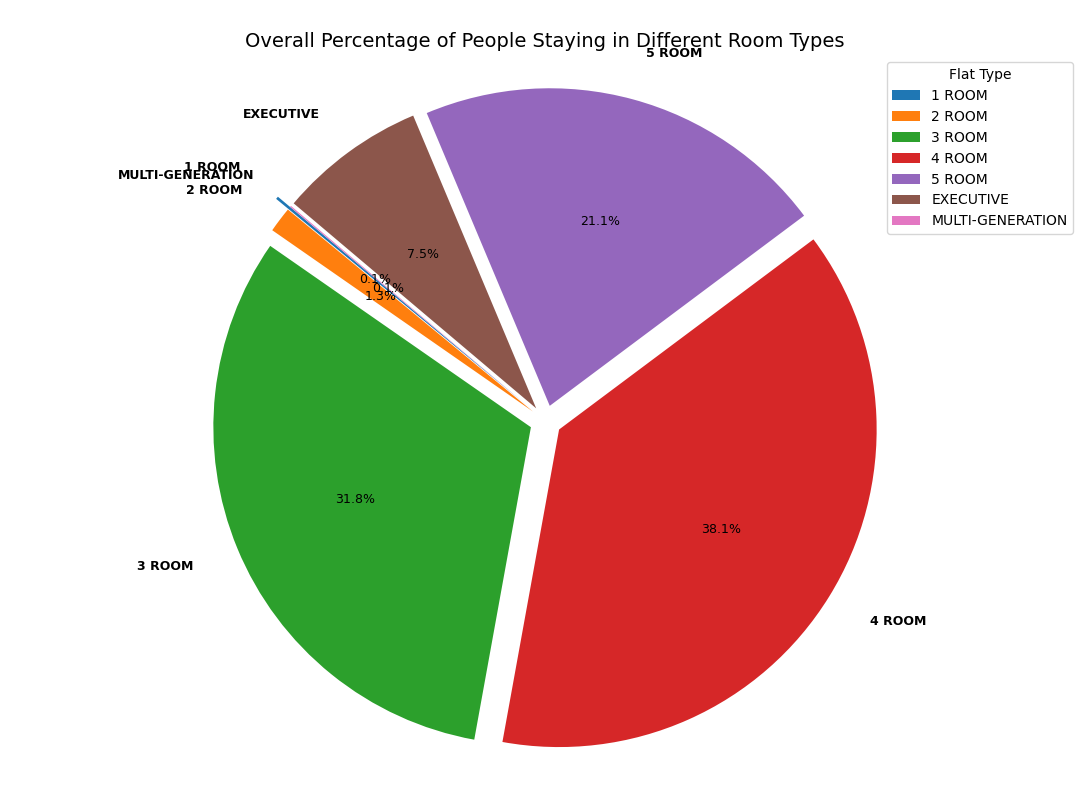

In [3]:
import numpy as np
import matplotlib.pyplot as plt

#load data
data = np.genfromtxt(
    "combined_resale_price4.csv",
    skip_header=1,
    delimiter=",",
    missing_values=['na', '-'],
    filling_values=0,
    dtype=[
        ('month', 'U7'),
        ('town', 'U50'),
        ('flat_type', 'U50'),
        ('block', 'U50'),
        ('street_name', 'U50'),
        ('storey_range', 'U50'),
        ('floor_area_sqm', 'f8'),
        ('flat_model', 'U50'),
        ('lease_commence_date', 'f8'),
        ('remaining_lease', 'U50'),
        ('resale_price', 'f8')
    ]
)

#count occurence of each unique flat type
unique_flat_types, counts = np.unique(data['flat_type'], return_counts=True)

# calculate the total number of entries
total_count = np.sum(counts)

# calculate the percentage for each flat type
percentages = (counts / total_count) * 100

# Display the results
print("Percentage of people staying in different room types:")
for flat_type, percentage in zip(unique_flat_types, percentages):
    print(f"{flat_type}: {percentage:.2f}%")

#spread out the piecharts
explode = (0.1,0.05,0.05,0.05,0.05,0.05,0.05)

#plot the piechart
fig, ax = plt.subplots(figsize=(11, 8))
wedges, texts, autotexts = ax.pie(
    percentages,
    explode=explode,
    labels=unique_flat_types,
    autopct='%1.1f%%',
    pctdistance=0.6,
    labeldistance=1.15,
    startangle=140,
    textprops={'fontsize': 9},
)
for text in texts:
    text.set_fontweight('bold')

plt.legend(title="Flat Type")
    

#Title and axis
plt.title("\nOverall Percentage of People Staying in Different Room Types", fontsize=14)
plt.axis('equal')  
plt.tight_layout()
plt.savefig("OverallPercentageinDifferentRoomType.png",dpi=300, bbox_inches="tight")
plt.show()

#multigeneration only 0.1%, hence also most exp

The data is only available for these years: [2021 2022 2023 2024]

Number of unique estates: 27

The rental prices of these estates are calculated: ['ANG MO KIO' 'BEDOK' 'BISHAN' 'BUKIT BATOK' 'BUKIT MERAH' 'BUKIT PANJANG'
 'BUKIT TIMAH' 'CENTRAL' 'CHOA CHU KANG' 'CLEMENTI' 'GEYLANG' 'HOUGANG'
 'JURONG EAST' 'JURONG WEST' 'KALLANG/WHAMPOA' 'MARINE PARADE' 'PASIR RIS'
 'PUNGGOL' 'QUEENSTOWN' 'SEMBAWANG' 'SENGKANG' 'SERANGOON' 'TAMPINES'
 'TENGAH' 'TOA PAYOH' 'WOODLANDS' 'YISHUN']

Number of unique flat types: 6

The rental prices of these flat types calculated: ['1-ROOM' '2-ROOM' '3-ROOM' '4-ROOM' '5-ROOM' 'EXECUTIVE']

Total number of rented households by flat type:
1-ROOM: 44 households
2-ROOM: 2889 households
3-ROOM: 46576 households
4-ROOM: 51455 households
5-ROOM: 33919 households
EXECUTIVE: 7943 households


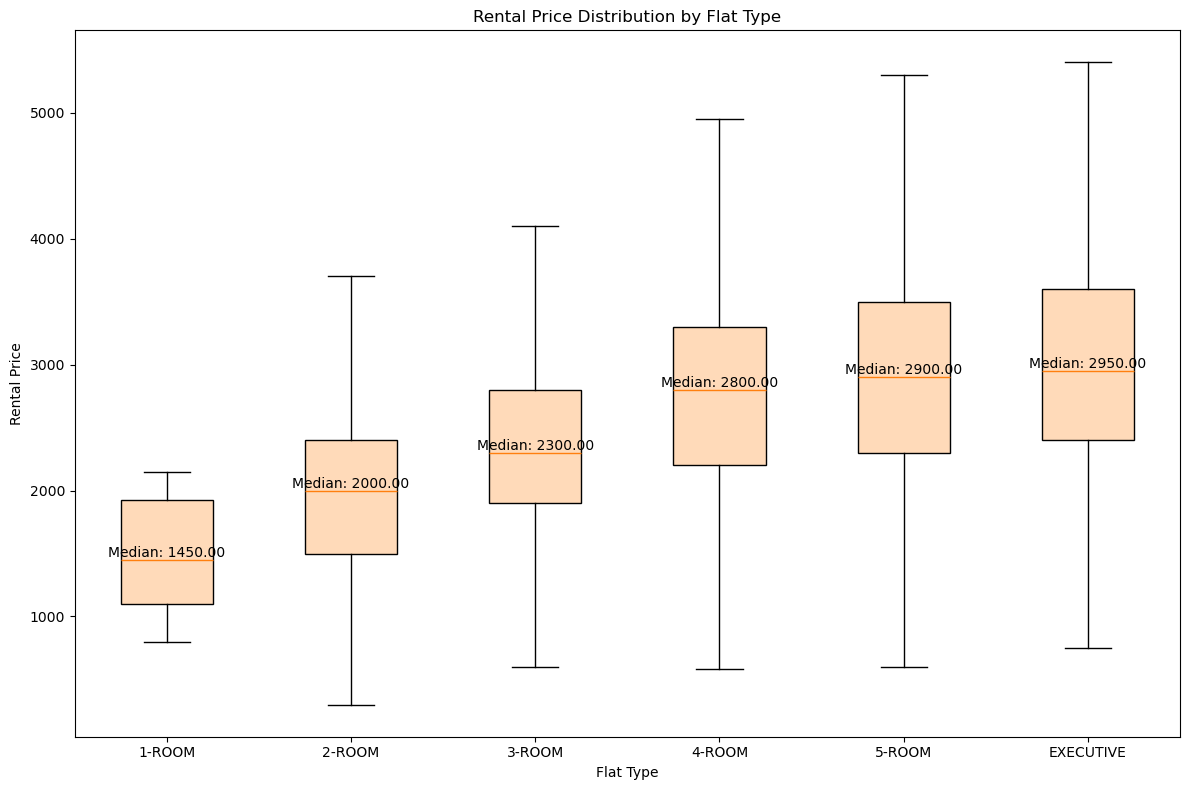

In [9]:
import numpy as np
import matplotlib.pyplot as plt

data = np.genfromtxt(
    "RentingOutofFlats2024.csv",
    skip_header=1,
    delimiter=",",
    missing_values=['na', '-'],
    filling_values=0.0,
    dtype=[
        ('rent_approval_date', 'U6'),  # e.g., 'YYYY-MM'
        ('town', 'U50'),
        ('block', 'U50'),
        ('street_name', 'U50'),
        ('flat_type', 'U50'), 
        ('monthly_rent', 'f8')
    ]
)

# Extract relevant columns
monthly_rent = data['monthly_rent']
estates = data['town']
flat_types = data['flat_type']

# Define year range
year_range = np.arange(2021, 2025)
print(f'The data is only available for these years: {year_range}')

# Find unique estates
unique_town = np.unique(estates)
print(f'\nNumber of unique estates: {len(unique_town)}')
print(f'\nThe rental prices of these estates are calculated: {unique_town}')

# Find unique flat types
unique_flat = np.unique(flat_types)
print(f'\nNumber of unique flat types: {len(unique_flat)}')
print(f'\nThe rental prices of these flat types calculated: {unique_flat}')

# Create a dictionary to store rents by flat type
rents_by_flat_type = {flat: [] for flat in unique_flat}

# Group rents by flat type
for i, flat in enumerate(flat_types):
    rents_by_flat_type[flat].append(monthly_rent[i])
flat_type_rents = [rents_by_flat_type[flat] for flat in unique_flat]

# Calculate the median and mean for each flat type
flat_type_medians = [np.median(rents_by_flat_type[flat]) for flat in unique_flat]
flat_type_means = [np.mean(rents_by_flat_type[flat]) for flat in unique_flat]

# Calculate the total number of renting households for each flat type
flat_type_counts = {flat: len(rents_by_flat_type[flat]) for flat in unique_flat}

# Display the total number of renting households by flat type
print("\nTotal number of rented households by flat type:")
for flat in unique_flat:
    print(f"{flat}: {flat_type_counts[flat]} households")

# plot boxplot
plt.figure(figsize=(12, 8))
plt.boxplot(flat_type_rents,patch_artist=True,boxprops=dict(facecolor='peachpuff', color='black'),
            tick_labels=unique_flat,showfliers=False, vert=True)

# Annotate median on boxplot
for i, median in enumerate(flat_type_medians):
    plt.text(i + 1, median, f'Median: {median:.2f}', ha='center', va='bottom', color='black', fontsize=10)

plt.title("Rental Price Distribution by Flat Type from 2021 to 2024")
plt.xlabel("Flat Type")
plt.ylabel("Rental Price")
plt.tight_layout()
plt.savefig("RentalDistributionbyFlatType.png",dpi=300, bbox_inches="tight")
plt.show()
